In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv file test and train,and storing them both in df using concat 
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
train["source"]="train"
test["source"]="test"
df=pd.concat([train,test],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


- new column source has appeared this is because df has datas from different sources, so to identify where the data has come from 

#### checking data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

#### checking nulls

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

- null data present in Item_Weight and in Outlet_Size, needed to be treated later

- Item_Outlet_Sales have nulls this is from test file where predictions have to be made from the known feeature data

#### Imputing missing datas

- Item_Weight: weight imputed by finding mean of weights belonging to that category in Item_Identifier
- Using mean because its continous data

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

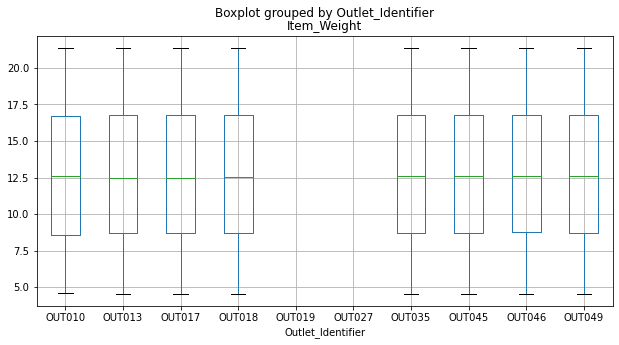

In [5]:
#visualizing how the data is spread 
df.boxplot(column='Item_Weight', by='Outlet_Identifier',figsize=(10,5))

there is data missing in OUT019 and OUT027, mostly due to missing weights presence 

In [6]:
#finding mean weight of Item_Weight by grouping it with Item_Identifier
item_mean_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')
item_mean_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [7]:
#storing index values where nulls are present
pos = df['Item_Weight'].isnull()

In [8]:
# impute values
df.loc[pos, 'Item_Weight'] = df.loc[pos, 'Item_Identifier'].apply(lambda x: item_mean_weight.loc[x])

- location where nulls Item_Weight are present is matched with the position of Item_Identifier, to get the Item_Identifier code 

- based on the Item_Identifier code the function searches for its location in the pivot table and gets the corresponding average weight which is stored in the Item_Weight 

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

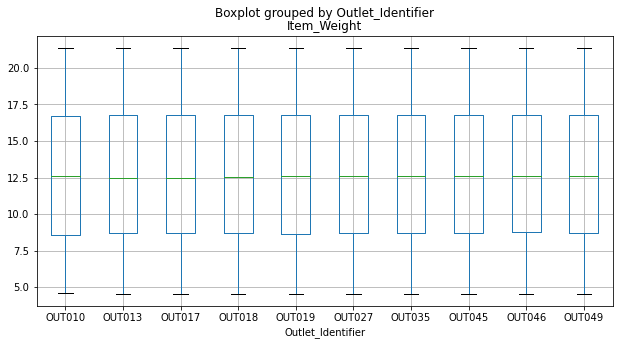

In [9]:
#visualizing 
df.boxplot(column='Item_Weight', by='Outlet_Identifier',figsize=(10,5))

#### Outlet_Size

impute the missing values of Outlet_size by the mode size for each Outlet_Type

In [10]:
#checking for nulls
df['Outlet_Size'].isna().sum()

4016

In [11]:
#impute 
from scipy.stats import mode
outlet_size_modes=df.groupby(["Outlet_Type"]).agg({"Outlet_Size":lambda x: x.value_counts().index[0]})
outlet_size_modes


,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


- grouped by Outlet_Type and agg by Outlet_Size 
- the function return the no of outlet (numerical) 
- index causes it to change from its number form to categorical form indicating if its small. medium, high 
- index[0] causes it to return the first mode used because Supermarket Type1 has three types of Outlet size and the most prominent one is small outlets hence imputed by small outlet

In [12]:
for index in outlet_size_modes.index:
    pos=df.loc[df["Outlet_Type"]==index,["Outlet_Size"]].isnull()
    for index_2 in pos.index:
        if pos.loc[index_2][0]==True:
            df.loc[index_2,["Outlet_Size"]]=outlet_size_modes.loc[index][0]

- loop here index takes value of outlet_Type
- pos
    - matches the outlet_type and stores its index
    - isnull condition is checked on outlet_size amd returns True/False
- The True values are scrutinized by the if condition taking only those that have nulls
- Storing the mode value to those nulls in position where nulls are present in Outlet_Size

In [13]:
#checking for nulls
df['Outlet_Size'].isna().sum()

0

#### checking how the data is defined statistically

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.065953,141.004977,1997.830681,2181.288914
std,4.651716,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Visibility has value 0 needs to be treated

#### Treating item_visibility

In [15]:
#grouping by Item_Identifier and aggregating the mean of Item_Visibility to fill those value which has value 0
item_visibility_means=df.groupby(["Item_Identifier"]).agg({"Item_Visibility":"mean"})
item_visibility_means

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [16]:
for index in item_visibility_means.index:
    zero=df.loc[(df["Item_Identifier"]==index)&(df["Item_Visibility"]==0)]
    for index_2 in zero.index:
        df.loc[index_2,["Item_Visibility"]]=item_visibility_means.loc[index][0]
        

- loop run by using the Item_Identifier
- zero_visibility_rows checks the Item_Identifier code and where Item_Visibility has value zero and stores its position and code
- loop runs based on index values stored
- here the mean value is stored where the Item_Visibility has value zero

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.069710,141.004977,1997.830681,2181.288914
std,4.651716,0.049728,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.031145,94.012000,1987.000000,834.247400
50%,12.600000,0.057194,142.247000,1999.000000,1794.331000
75%,16.750000,0.096930,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### seperating numerical data and categorical data and plotting

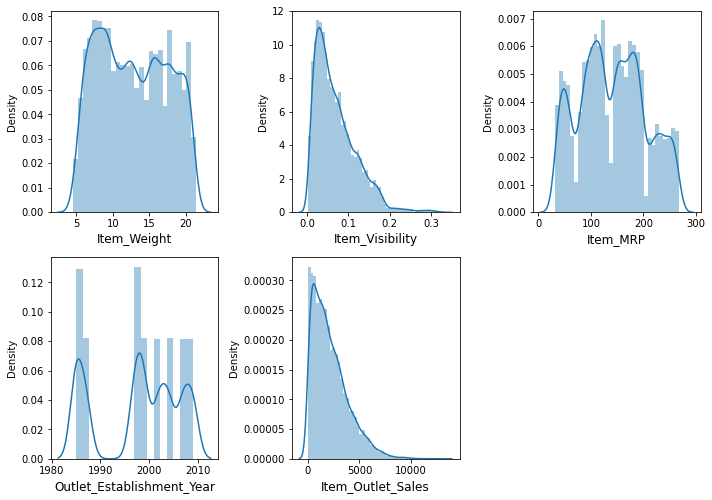

In [18]:
#numericalColumn stores all data that are numerical datatype
numericalColumns=df.select_dtypes(include=np.number).columns
j=0
plt.figure(figsize=(10,10))
for column in numericalColumns:
    plt.subplot(3,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

1. Item_Weight appears to have weights in 3 categories 5-10, 10.5-15, 15.5-20 doesnt have bell curve, skewness is very small

2. Item_Visibility has positive skew, has data in the range 0.01-0.2 and presence of outliers can be noted on right half of the graph

3. Item_MRP appears to have MRP in 4 categories 31-90, 100-150, 160-200, 210-270 with 4 peaks in each categories 

4. Outlet_Establishment_Year large no of outlets were introduced in 1980s and 2000s

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64


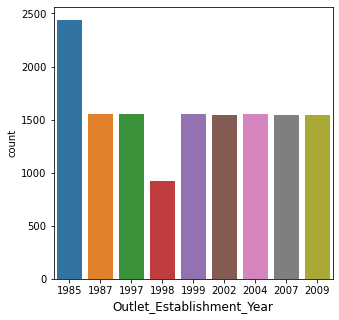

In [19]:
#used to visualize Outlet_Establishment_Year
plt.figure(figsize=(5,5))
sns.countplot(df['Outlet_Establishment_Year'])
plt.xlabel("Outlet_Establishment_Year",fontsize=12)
print(df["Outlet_Establishment_Year"].value_counts())

gives an idea how many outlets came out each year from 1985-2009

#### Categorical datas

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int

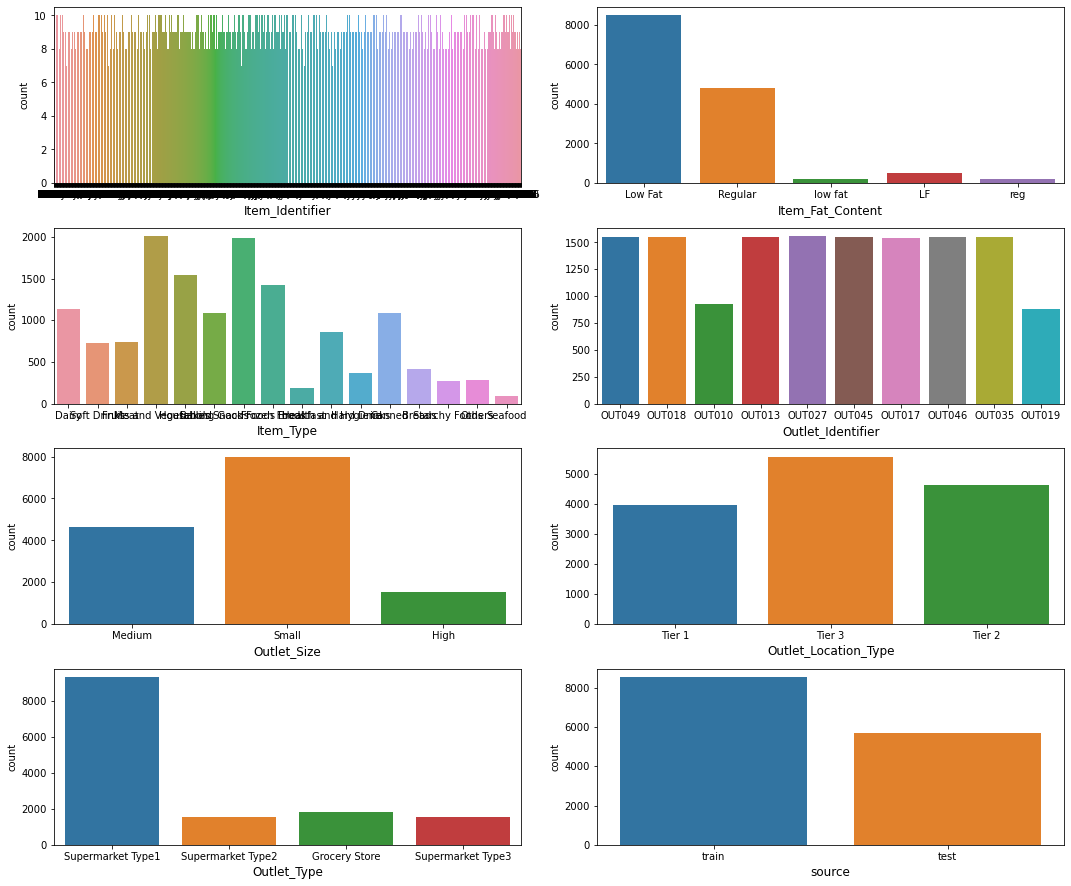

In [20]:
#objectColumns stores all data that are objject datatype
objectColumns=df.select_dtypes(include=np.object).columns
j=0
plt.figure(figsize=(15,15))
for column in objectColumns:
    plt.subplot(5,2,j+1)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=12)
    print(df[column].value_counts())
    print('\n')
    j+=1
plt.tight_layout() 

1. Item_Fat_Content has Low Fat, LF, low fat denoting the same kind, also Regular and reg denoting the same kind needs to be treated

2. most of the people prefer low fat content food, indicating that they are health conscious

3. Customers are intrested to buy Fruits and Vegetables, Snacks and Household items and least intrested in Seafood items

4. Outlet 10 and 19 performs the least compared to other outlets

5. The small size outlet is the dominant size,  followed by medium and high

6. The most prominent location where the outlets are located belongs to Tier3

7. SupermarketType1 is the prominent outlet type for the company, followed by Grocery Store

8. Train and Test denotes the no if datas present in each dataset




#### Treating low fat and LF to Low Fat and reg to Regular

In [21]:
#replacing low fat and LF to Low Fat
#replacing reg to Regular
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

#### Bivariate analysis

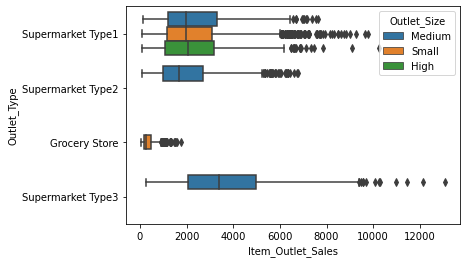

In [22]:
ax = sns.boxplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales', hue='Outlet_Size')

1. Grocery store has the least sales, also belongs to category small 
  
2. SupermarketType1  has the second highest sales, also presence of outliers in large amount, it has outlets in medium, small and high, but all have sales almost similar

3. SupermarketType2 has medium type outlets and has moderate sales

4. SupermarketType3 has medium type outlets, has the highest sales

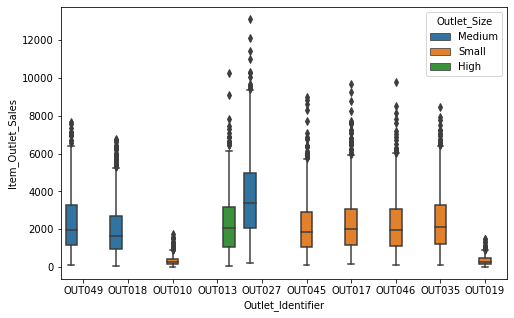

In [23]:
plt.figure(figsize=(8,5))
ax = sns.boxplot( x='Outlet_Identifier', y='Item_Outlet_Sales', hue='Outlet_Size',data=df)
plt.ylabel('Item_Outlet_Sales')
plt.show()

- OUT010,OUT045,OUT017,OUT046,OUT035,OUT19 are of small size

- OUT010 and OUT019 has the least sales 

- OUT013 is the only one which is high size

- OUT049,018,027 are of medium size

- OUT027 has the highest sales when compared to other outlets

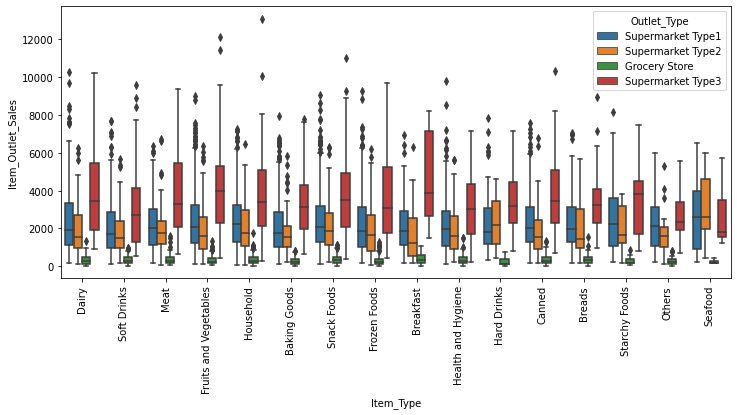

In [24]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

- Grocery store sells the least items compared to other 

- SupermarketType3 sells the most

#### Encoding 

In [25]:
objectColumns=objectColumns.drop(["Item_Identifier","Outlet_Identifier",'source'])

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in objectColumns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,0.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380,train
1,DRC01,5.92,1.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228,train
2,FDN15,17.50,0.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700,train
3,FDX07,19.20,1.0,0.017834,6.0,182.0950,OUT010,1998,2.0,2.0,0.0,732.3800,train
4,NCD19,8.93,0.0,0.009780,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1.0,0.013496,13.0,141.3154,OUT046,1997,2.0,0.0,1.0,NaN,test
14200,FDD47,7.60,1.0,0.142991,15.0,169.1448,OUT018,2009,1.0,2.0,2.0,NaN,test
14201,NCO17,10.00,0.0,0.073529,8.0,118.7440,OUT045,2002,2.0,1.0,1.0,NaN,test
14202,FDJ26,15.30,1.0,0.088380,3.0,214.6218,OUT017,2007,2.0,1.0,1.0,NaN,test


#### checking skewness

In [27]:
df.skew()

Item_Weight                  0.100417
Item_Fat_Content             0.613645
Item_Visibility              1.257405
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

few columns need to be treated as the permissible limit is from .65 to -0.65

In [28]:
#cols that are continous (numerical)
cols_to_be_checked=["Item_MRP","Item_Visibility","Item_Weight","Outlet_Establishment_Year"]

In [29]:
df.skew()
for col in df.skew().index:
    if col in cols_to_be_checked:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

- here col takes all the column values in whose data skewness can be found
- first if condition matches cols_to_be_checked with col, satisfies goes to nexted if
    - where first if checks if skew value>0.5 then sqrt function is applied to that column
    - second if checks if skew value<-0.5  then cube root function is applied to that column
    - if both conditions arent satisfied then its ignored and next iteration is run

In [30]:
#check
df.skew()

Item_Weight                  0.100417
Item_Fat_Content             0.613645
Item_Visibility              0.414133
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

the numerical datas are in acceptable limits ie 0.65 to -0.65

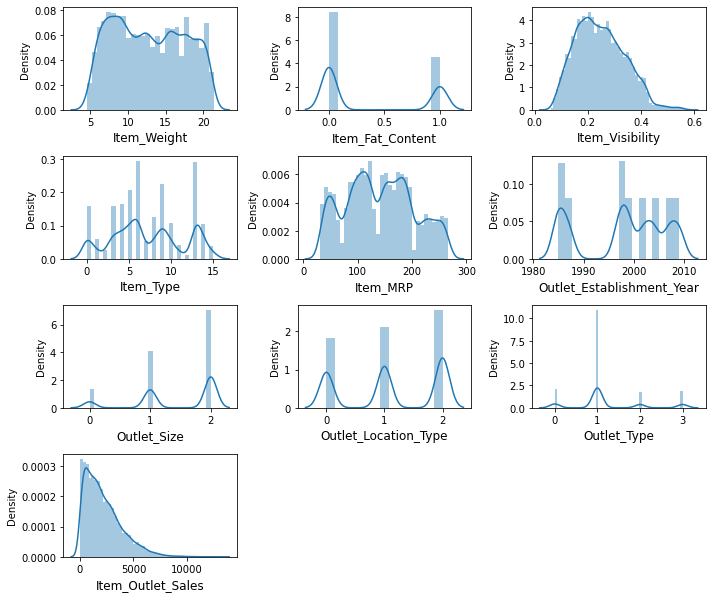

In [31]:
j=0
k=df.copy()
k.drop(['Item_Identifier','Outlet_Identifier','source'],axis=1,inplace=True)
plt.figure(figsize=(10,10))
for column in k:
    plt.subplot(5,3,j+1)
    sns.distplot(k[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()  

#### droping two rows 'Item_Identifier','Outlet_Identifier' as they wont contribute much 

In [32]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [33]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,0.0,0.126678,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380,train
1,5.92,1.0,0.138846,14.0,48.2692,2009,1.0,2.0,2.0,443.4228,train
2,17.50,0.0,0.129461,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700,train
3,19.20,1.0,0.133545,6.0,182.0950,1998,2.0,2.0,0.0,732.3800,train
4,8.93,0.0,0.098893,9.0,53.8614,1987,0.0,2.0,1.0,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1.0,0.116174,13.0,141.3154,1997,2.0,0.0,1.0,NaN,test
14200,7.60,1.0,0.378141,15.0,169.1448,2009,1.0,2.0,2.0,NaN,test
14201,10.00,0.0,0.271162,8.0,118.7440,2002,2.0,1.0,1.0,NaN,test
14202,15.30,1.0,0.297288,3.0,214.6218,2007,2.0,1.0,1.0,NaN,test


#### checking correlation

In [34]:
df.corr()['Item_Outlet_Sales'].sort_values()

Outlet_Size                 -0.162753
Item_Visibility             -0.111611
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.013261
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

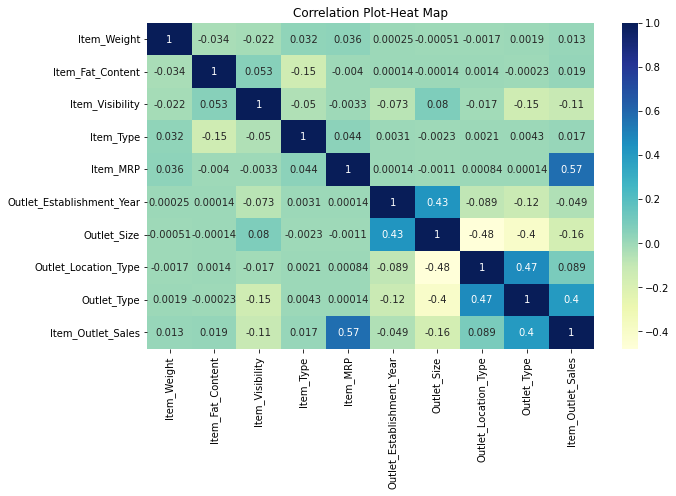

In [35]:
#plotting heatmap to see the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

feature to feature correlation is very less and the highest value is 0.43 

In [36]:
#checking for multicollinearity by using vif
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop(['Item_Outlet_Sales','source'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,1.003450,Item_Weight
1,1.025479,Item_Fat_Content
2,1.049937,Item_Visibility
3,1.026753,Item_Type
4,1.003137,Item_MRP
5,1.266795,Outlet_Establishment_Year
6,1.697869,Outlet_Size
7,1.509862,Outlet_Location_Type
8,1.378958,Outlet_Type


the vif value is less than 10 within acceptable limits

#### splitting back to test and train dataset

In [37]:
#Lets seprate the train and test
df_train=df.loc[df["source"]=="train"]
df_test=df.loc[df["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')


In [38]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,20.750,0.0,0.086976,13.0,107.8622,1999,1.0,0.0,1.0,NaN,test
1,8.300,1.0,0.196030,4.0,87.3198,2007,2.0,1.0,1.0,NaN,test
2,14.600,0.0,0.315555,11.0,241.7538,1998,2.0,2.0,0.0,NaN,test
3,7.315,0.0,0.124050,13.0,155.0340,2007,2.0,1.0,1.0,NaN,test
4,13.600,1.0,0.344383,4.0,234.2300,1985,1.0,2.0,3.0,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,1.0,0.116174,13.0,141.3154,1997,2.0,0.0,1.0,NaN,test
5677,7.600,1.0,0.378141,15.0,169.1448,2009,1.0,2.0,2.0,NaN,test
5678,10.000,0.0,0.271162,8.0,118.7440,2002,2.0,1.0,1.0,NaN,test
5679,15.300,1.0,0.297288,3.0,214.6218,2007,2.0,1.0,1.0,NaN,test


#### dropping Item_Outlet_Sales and source for df_test

In [39]:
df_test.drop(columns=["Item_Outlet_Sales",'source'],inplace=True)
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0.0,0.086976,13.0,107.8622,1999,1.0,0.0,1.0
1,8.300,1.0,0.196030,4.0,87.3198,2007,2.0,1.0,1.0
2,14.600,0.0,0.315555,11.0,241.7538,1998,2.0,2.0,0.0
3,7.315,0.0,0.124050,13.0,155.0340,2007,2.0,1.0,1.0
4,13.600,1.0,0.344383,4.0,234.2300,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...
5676,10.500,1.0,0.116174,13.0,141.3154,1997,2.0,0.0,1.0
5677,7.600,1.0,0.378141,15.0,169.1448,2009,1.0,2.0,2.0
5678,10.000,0.0,0.271162,8.0,118.7440,2002,2.0,1.0,1.0
5679,15.300,1.0,0.297288,3.0,214.6218,2007,2.0,1.0,1.0


#### dropping  source for df_train

In [40]:
df_train.drop(columns=['source'],inplace=True)
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.126678,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.920,1.0,0.138846,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.500,0.0,0.129461,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.200,1.0,0.133545,6.0,182.0950,1998,2.0,2.0,0.0,732.3800
4,8.930,0.0,0.098893,9.0,53.8614,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.0,0.238293,13.0,214.5218,1987,0.0,2.0,1.0,2778.3834
8519,8.380,1.0,0.216754,0.0,108.1570,2002,2.0,1.0,1.0,549.2850
8520,10.600,0.0,0.187580,8.0,85.1224,2004,2.0,1.0,1.0,1193.1136
8521,7.210,1.0,0.381078,13.0,103.1332,2009,1.0,2.0,2.0,1845.5976


#### outliers


- train dataset

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
df_x=df_train[(z<3).all(axis=1)]
data_loss=((df_train.shape[0]-df_x.shape[0])/df_train.shape[0])*100
print("data loss ", data_loss, " %")

data loss  1.525284524228558  %


- test dataset

In [42]:
z=np.abs(zscore(df_test))
df_xp=df_test[(z<3).all(axis=1)]
data_loss=((df_test.shape[0]-df_xp.shape[0])/df_test.shape[0])*100
print("data loss ", data_loss, " %")

data loss  0.4752684386551663  %


#### spliting data for train dataset and performing scaling to normalize the features

In [43]:
x=df_x.drop(['Item_Outlet_Sales'],axis=1)
Y=df_x['Item_Outlet_Sales']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)

#### Trying differnent algorithm

In [44]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 

In [45]:
#loop used to find the best random state
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [46]:

# used to get test accuracy, train accuracy, mse, mae
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    

In [47]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [48]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  10.715778545830624
r2 score corresponding to  1  is  15.696073977636205
r2 score corresponding to  2  is  18.657016598126898
r2 score corresponding to  3  is  16.74887755840153
r2 score corresponding to  4  is  18.785656373886084
r2 score corresponding to  5  is  18.72965011141874
r2 score corresponding to  6  is  12.868941461591742
r2 score corresponding to  7  is  20.011092768201312
r2 score corresponding to  8  is  12.75536906617365
r2 score corresponding to  9  is  12.693805802286672
r2 score corresponding to  10  is  17.528496209372634
r2 score corresponding to  11  is  8.856416900352237
r2 score corresponding to  12  is  15.555616024230712
r2 score corresponding to  13  is  9.60615047247514
r2 score corresponding to  14  is  10.778399132902727
r2 score corresponding to  15  is  17.290444079593705
r2 score corresponding to  16  is  16.976713327321903
r2 score corresponding to  17  is  19.39244032947246
r2 score corresponding to  18  is  14.0543971

In [49]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test,R)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test,R)

test accuracy is 28.1
train accuracy is 100.0


At cv is 2 cv score is 16.58  
 test accuracy is 28.1 

At cv is 3 cv score is 14.1  
 test accuracy is 28.1 

At cv is 4 cv score is 14.72  
 test accuracy is 28.1 

At cv is 5 cv score is 15.21  
 test accuracy is 28.1 

At cv is 6 cv score is 16.48  
 test accuracy is 28.1 

At cv is 7 cv score is 14.47  
 test accuracy is 28.1 

At cv is 8 cv score is 13.33  
 test accuracy is 28.1 

At cv is 9 cv score is 16.85  
 test accuracy is 28.1 

At cv is 10 cv score is 15.46  
 test accuracy is 28.1 

At cv is 11 cv score is 15.78  
 test accuracy is 28.1 

At cv is 12 cv score is 16.34  
 test accuracy is 28.1 

At cv is 13 cv score is 14.56  
 test accuracy is 28.1 

At cv is 14 cv score is 17.84  
 test accuracy is 28.1 

At cv is 15 cv score is 17.37  
 test accuracy is 28.1 

At cv is 16 cv score is 15.88  
 test accuracy is 28.1 

At cv is 17 cv score is 17.19  
 test accuracy is 28.1 

At cv is 18 cv score is 15.67  
 test accuracy is

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  53.796872327135745
r2 score corresponding to  1  is  54.268387892294065
r2 score corresponding to  2  is  56.26631825274173
r2 score corresponding to  3  is  55.95398335009225
r2 score corresponding to  4  is  55.176079071364015
r2 score corresponding to  5  is  55.80235629050081
r2 score corresponding to  6  is  52.87511865267728
r2 score corresponding to  7  is  55.248500040148315
r2 score corresponding to  8  is  53.522983516476444
r2 score corresponding to  9  is  54.559690129367866
r2 score corresponding to  10  is  56.08188627549646
r2 score corresponding to  11  is  51.80043744694791
r2 score corresponding to  12  is  54.564283359444254
r2 score corresponding to  13  is  54.99923464549141
r2 score corresponding to  14  is  52.53263238513453
r2 score corresponding to  15  is  50.80048995873809
r2 score corresponding to  16  is  56.3791277649652
r2 score corresponding to  17  is  55.8131550968343
r2 score corresponding to  18  is  54.7463631973376

In [51]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x2_train,x2_test,y2_train,y2_test,R)
print('\n')
score(rf_reg,x2_train,x2_test,y2_train,y2_test,R)

test accuracy is 58.5
train accuracy is 93.4


At cv is 2 cv score is 53.59  
 test accuracy is 58.5 

At cv is 3 cv score is 53.81  
 test accuracy is 58.5 

At cv is 4 cv score is 54.17  
 test accuracy is 58.5 

At cv is 5 cv score is 53.83  
 test accuracy is 58.5 

At cv is 6 cv score is 54.47  
 test accuracy is 58.5 

At cv is 7 cv score is 54.62  
 test accuracy is 58.5 

At cv is 8 cv score is 54.44  
 test accuracy is 58.5 

At cv is 9 cv score is 54.42  
 test accuracy is 58.5 

At cv is 10 cv score is 54.33  
 test accuracy is 58.5 

At cv is 11 cv score is 54.63  
 test accuracy is 58.5 

At cv is 12 cv score is 54.47  
 test accuracy is 58.5 

At cv is 13 cv score is 54.28  
 test accuracy is 58.5 

At cv is 14 cv score is 54.45  
 test accuracy is 58.5 

At cv is 15 cv score is 54.4  
 test accuracy is 58.5 

At cv is 16 cv score is 54.4  
 test accuracy is 58.5 

At cv is 17 cv score is 54.39  
 test accuracy is 58.5 

At cv is 18 cv score is 54.32  
 test accuracy is 5

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  49.75429582683809
r2 score corresponding to  1  is  52.79357305373998
r2 score corresponding to  2  is  51.95924504195568
r2 score corresponding to  3  is  54.3721843236032
r2 score corresponding to  4  is  50.07731318020889
r2 score corresponding to  5  is  52.19514463969222
r2 score corresponding to  6  is  50.4493612865879
r2 score corresponding to  7  is  50.96238556391521
r2 score corresponding to  8  is  50.18212668467306
r2 score corresponding to  9  is  49.927280536114196
r2 score corresponding to  10  is  50.19620441170704
r2 score corresponding to  11  is  49.86797517333733
r2 score corresponding to  12  is  50.53002298991951
r2 score corresponding to  13  is  50.07919126909361
r2 score corresponding to  14  is  48.696138704032265
r2 score corresponding to  15  is  47.104567200534454
r2 score corresponding to  16  is  52.541552463147376
r2 score corresponding to  17  is  53.4454857489373
r2 score corresponding to  18  is  51.165123086129526
r

In [53]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x3_train,x3_test,y3_train,y3_test,R)
print('\n')
score(knr,x3_train,x3_test,y3_train,y3_test,R)

test accuracy is 55.3
train accuracy is 66.5


At cv is 2 cv score is 49.48  
 test accuracy is 55.3 

At cv is 3 cv score is 50.72  
 test accuracy is 55.3 

At cv is 4 cv score is 50.46  
 test accuracy is 55.3 

At cv is 5 cv score is 50.35  
 test accuracy is 55.3 

At cv is 6 cv score is 50.97  
 test accuracy is 55.3 

At cv is 7 cv score is 50.88  
 test accuracy is 55.3 

At cv is 8 cv score is 51.22  
 test accuracy is 55.3 

At cv is 9 cv score is 50.53  
 test accuracy is 55.3 

At cv is 10 cv score is 50.98  
 test accuracy is 55.3 

At cv is 11 cv score is 50.87  
 test accuracy is 55.3 

At cv is 12 cv score is 50.86  
 test accuracy is 55.3 

At cv is 13 cv score is 50.99  
 test accuracy is 55.3 

At cv is 14 cv score is 50.98  
 test accuracy is 55.3 

At cv is 15 cv score is 50.82  
 test accuracy is 55.3 

At cv is 16 cv score is 51.11  
 test accuracy is 55.3 

At cv is 17 cv score is 51.0  
 test accuracy is 55.3 

At cv is 18 cv score is 50.76  
 test accuracy is 

In [54]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  49.59236789399951
r2 score corresponding to  1  is  48.664723664777966
r2 score corresponding to  2  is  48.830324142176764
r2 score corresponding to  3  is  48.66528852531239
r2 score corresponding to  4  is  49.905856122684575
r2 score corresponding to  5  is  49.50069814985791
r2 score corresponding to  6  is  48.02214873872966
r2 score corresponding to  7  is  49.62132655480386
r2 score corresponding to  8  is  48.82723039327772
r2 score corresponding to  9  is  49.18990130851262
r2 score corresponding to  10  is  51.10815571927845
r2 score corresponding to  11  is  48.60001224966945
r2 score corresponding to  12  is  50.66339915343636
r2 score corresponding to  13  is  48.509353815048115
r2 score corresponding to  14  is  49.21537079750099
r2 score corresponding to  15  is  44.71513906860811
r2 score corresponding to  16  is  49.89693787176033
r2 score corresponding to  17  is  51.3751043245136
r2 score corresponding to  18  is  49.37740598617288


In [55]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x4_train,x4_test,y4_train,y4_test,R)
print('\n')
score(lnr,x4_train,x4_test,y4_train,y4_test,R)

test accuracy is 52.1
train accuracy is 48.4


At cv is 2 cv score is 48.96  
 test accuracy is 52.1 

At cv is 3 cv score is 48.94  
 test accuracy is 52.1 

At cv is 4 cv score is 48.9  
 test accuracy is 52.1 

At cv is 5 cv score is 48.92  
 test accuracy is 52.1 

At cv is 6 cv score is 48.95  
 test accuracy is 52.1 

At cv is 7 cv score is 48.99  
 test accuracy is 52.1 

At cv is 8 cv score is 48.94  
 test accuracy is 52.1 

At cv is 9 cv score is 48.94  
 test accuracy is 52.1 

At cv is 10 cv score is 48.94  
 test accuracy is 52.1 

At cv is 11 cv score is 48.94  
 test accuracy is 52.1 

At cv is 12 cv score is 48.93  
 test accuracy is 52.1 

At cv is 13 cv score is 48.82  
 test accuracy is 52.1 

At cv is 14 cv score is 48.88  
 test accuracy is 52.1 

At cv is 15 cv score is 48.91  
 test accuracy is 52.1 

At cv is 16 cv score is 48.9  
 test accuracy is 52.1 

At cv is 17 cv score is 48.79  
 test accuracy is 52.1 

At cv is 18 cv score is 48.76  
 test accuracy is 5

In [56]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  56.799358349720855
r2 score corresponding to  1  is  55.52348010962789
r2 score corresponding to  2  is  55.88744992120838
r2 score corresponding to  3  is  54.78864183887233
r2 score corresponding to  4  is  56.50902134075487
r2 score corresponding to  5  is  58.65422893903417
r2 score corresponding to  6  is  54.93027108460229
r2 score corresponding to  7  is  55.59418744163438
r2 score corresponding to  8  is  55.265771859249035
r2 score corresponding to  9  is  55.371624523726815
r2 score corresponding to  10  is  57.75138374028674
r2 score corresponding to  11  is  55.79285715277593
r2 score corresponding to  12  is  55.80654295499055
r2 score corresponding to  13  is  57.58701033077097
r2 score corresponding to  14  is  55.950621452708575
r2 score corresponding to  15  is  52.76902983925352
r2 score corresponding to  16  is  56.97315481301788
r2 score corresponding to  17  is  57.73416680371799
r2 score corresponding to  18  is  56.75355034745397

In [57]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)
print('\n')
score(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)

test accuracy is 58.6
train accuracy is 55.9


At cv is 2 cv score is 55.23  
 test accuracy is 58.6 

At cv is 3 cv score is 55.94  
 test accuracy is 58.6 

At cv is 4 cv score is 55.9  
 test accuracy is 58.6 

At cv is 5 cv score is 55.97  
 test accuracy is 58.6 

At cv is 6 cv score is 55.99  
 test accuracy is 58.6 

At cv is 7 cv score is 55.99  
 test accuracy is 58.6 

At cv is 8 cv score is 56.23  
 test accuracy is 58.6 

At cv is 9 cv score is 55.93  
 test accuracy is 58.6 

At cv is 10 cv score is 55.87  
 test accuracy is 58.6 

At cv is 11 cv score is 56.08  
 test accuracy is 58.6 

At cv is 12 cv score is 55.81  
 test accuracy is 58.6 

At cv is 13 cv score is 56.03  
 test accuracy is 58.6 

At cv is 14 cv score is 56.08  
 test accuracy is 58.6 

At cv is 15 cv score is 55.99  
 test accuracy is 58.6 

At cv is 16 cv score is 56.15  
 test accuracy is 58.6 

At cv is 17 cv score is 56.06  
 test accuracy is 58.6 

At cv is 18 cv score is 56.0  
 test accuracy is 5

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  58.90896996333377
r2 score corresponding to  1  is  59.16733918922279
r2 score corresponding to  2  is  60.95748183354148
r2 score corresponding to  3  is  60.05959150720989
r2 score corresponding to  4  is  59.66516280171854
r2 score corresponding to  5  is  60.12581322447124
r2 score corresponding to  6  is  57.98327044379812
r2 score corresponding to  7  is  60.43649861245661
r2 score corresponding to  8  is  58.07175619534932
r2 score corresponding to  9  is  59.63540248973964
r2 score corresponding to  10  is  60.98641494016738
r2 score corresponding to  11  is  58.04451759067146
r2 score corresponding to  12  is  58.97003422322983
r2 score corresponding to  13  is  59.65772864540986
r2 score corresponding to  14  is  58.10532181895546
r2 score corresponding to  15  is  55.28673188196007
r2 score corresponding to  16  is  60.12092470844692
r2 score corresponding to  17  is  60.09286133286634
r2 score corresponding to  18  is  59.50948451103887
r2 

In [59]:
x6_train,x6_test,y6_train,y6_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x6_train,x6_test,y6_train,y6_test,R)
print('\n')
score(grad_reg,x6_train,x6_test,y6_train,y6_test,R)

test accuracy is 61.7
train accuracy is 62.2


At cv is 2 cv score is 58.55  
 test accuracy is 61.7 

At cv is 3 cv score is 58.94  
 test accuracy is 61.7 

At cv is 4 cv score is 58.74  
 test accuracy is 61.7 

At cv is 5 cv score is 58.72  
 test accuracy is 61.7 

At cv is 6 cv score is 58.94  
 test accuracy is 61.7 

At cv is 7 cv score is 58.95  
 test accuracy is 61.7 

At cv is 8 cv score is 58.83  
 test accuracy is 61.7 

At cv is 9 cv score is 58.85  
 test accuracy is 61.7 

At cv is 10 cv score is 58.86  
 test accuracy is 61.7 

At cv is 11 cv score is 58.98  
 test accuracy is 61.7 

At cv is 12 cv score is 58.89  
 test accuracy is 61.7 

At cv is 13 cv score is 58.91  
 test accuracy is 61.7 

At cv is 14 cv score is 58.85  
 test accuracy is 61.7 

At cv is 15 cv score is 58.94  
 test accuracy is 61.7 

At cv is 16 cv score is 58.81  
 test accuracy is 61.7 

At cv is 17 cv score is 58.92  
 test accuracy is 61.7 

At cv is 18 cv score is 58.82  
 test accuracy is

In [60]:
from sklearn.svm import SVR
svr_reg=SVR()
R=maxr2_score(svr_reg,X,Y)

r2 score corresponding to  0  is  6.516980894915614
r2 score corresponding to  1  is  6.345407955958482
r2 score corresponding to  2  is  8.777437989350412
r2 score corresponding to  3  is  8.776657640943197
r2 score corresponding to  4  is  5.665608921210419
r2 score corresponding to  5  is  6.534974981198105
r2 score corresponding to  6  is  6.336182813966317
r2 score corresponding to  7  is  6.676738989373776
r2 score corresponding to  8  is  6.369350003999596
r2 score corresponding to  9  is  7.332282222116926
r2 score corresponding to  10  is  6.282057236873251
r2 score corresponding to  11  is  6.124657383981413
r2 score corresponding to  12  is  6.674807705335029
r2 score corresponding to  13  is  6.06362915643659
r2 score corresponding to  14  is  6.313153898455637
r2 score corresponding to  15  is  6.0363624740543464
r2 score corresponding to  16  is  5.530446579002534
r2 score corresponding to  17  is  6.392739153721383
r2 score corresponding to  18  is  5.944481398893031
r2 

In [61]:
x7_train,x7_test,y7_train,y7_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svr_reg,x7_train,x7_test,y7_train,y7_test,R)
print('\n')
score(svr_reg,x7_train,x7_test,y7_train,y7_test,R)

test accuracy is 9.0
train accuracy is 7.0


At cv is 2 cv score is 2.75  
 test accuracy is 9.0 

At cv is 3 cv score is 4.89  
 test accuracy is 9.0 

At cv is 4 cv score is 5.97  
 test accuracy is 9.0 

At cv is 5 cv score is 6.58  
 test accuracy is 9.0 

At cv is 6 cv score is 6.99  
 test accuracy is 9.0 

At cv is 7 cv score is 7.3  
 test accuracy is 9.0 

At cv is 8 cv score is 7.5  
 test accuracy is 9.0 

At cv is 9 cv score is 7.66  
 test accuracy is 9.0 

At cv is 10 cv score is 7.79  
 test accuracy is 9.0 

At cv is 11 cv score is 7.87  
 test accuracy is 9.0 

At cv is 12 cv score is 7.98  
 test accuracy is 9.0 

At cv is 13 cv score is 7.98  
 test accuracy is 9.0 

At cv is 14 cv score is 8.07  
 test accuracy is 9.0 

At cv is 15 cv score is 8.17  
 test accuracy is 9.0 

At cv is 16 cv score is 8.21  
 test accuracy is 9.0 

At cv is 17 cv score is 8.18  
 test accuracy is 9.0 

At cv is 18 cv score is 8.26  
 test accuracy is 9.0 

At cv is 19 cv score is 8.3  


In [62]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
R=maxr2_score(xgb,X,Y)

r2 score corresponding to  0  is  52.20134999615264
r2 score corresponding to  1  is  52.90957332859746
r2 score corresponding to  2  is  54.807840105561624
r2 score corresponding to  3  is  53.89110169694655
r2 score corresponding to  4  is  53.26895382148415
r2 score corresponding to  5  is  56.170450810191056
r2 score corresponding to  6  is  50.068118413894915
r2 score corresponding to  7  is  53.962514464288056
r2 score corresponding to  8  is  51.052318112569196
r2 score corresponding to  9  is  52.38589320954027
r2 score corresponding to  10  is  53.65133742856714
r2 score corresponding to  11  is  49.04189618798662
r2 score corresponding to  12  is  53.422874432201795
r2 score corresponding to  13  is  51.78251999730578
r2 score corresponding to  14  is  50.65350115665572
r2 score corresponding to  15  is  48.51125010736151
r2 score corresponding to  16  is  52.503650902981924
r2 score corresponding to  17  is  52.251622513256635
r2 score corresponding to  18  is  54.4236848783

In [63]:
x8_train,x8_test,y8_train,y8_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(xgb,x8_train,x8_test,y8_train,y8_test,R)
print('\n')
score(xgb,x8_train,x8_test,y8_train,y8_test,R)

test accuracy is 56.2
train accuracy is 84.8


At cv is 2 cv score is 50.32  
 test accuracy is 56.2 

At cv is 3 cv score is 51.36  
 test accuracy is 56.2 

At cv is 4 cv score is 51.4  
 test accuracy is 56.2 

At cv is 5 cv score is 51.68  
 test accuracy is 56.2 

At cv is 6 cv score is 52.4  
 test accuracy is 56.2 

At cv is 7 cv score is 52.48  
 test accuracy is 56.2 

At cv is 8 cv score is 52.08  
 test accuracy is 56.2 

At cv is 9 cv score is 51.85  
 test accuracy is 56.2 

At cv is 10 cv score is 51.68  
 test accuracy is 56.2 

At cv is 11 cv score is 52.51  
 test accuracy is 56.2 

At cv is 12 cv score is 52.89  
 test accuracy is 56.2 

At cv is 13 cv score is 52.2  
 test accuracy is 56.2 

At cv is 14 cv score is 52.55  
 test accuracy is 56.2 

At cv is 15 cv score is 52.38  
 test accuracy is 56.2 

At cv is 16 cv score is 52.71  
 test accuracy is 56.2 

At cv is 17 cv score is 52.48  
 test accuracy is 56.2 

At cv is 18 cv score is 52.41  
 test accuracy is 56

#### Storing the datas to dataframe

In [64]:
L=['DT','RF','KNN','LR','ADA','GRAD','SVR','XGB']

In [65]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C,'mae':mae},index=L)
E


,test accuracy,cv_score,diff,mse,mae
DT,28.1,17.837673,10.262327,1.872562e+06,979.977101
RF,58.5,54.629267,3.870733,1.080090e+06,739.320491
KNN,55.3,51.217006,4.082994,1.125223e+06,774.478863
LR,52.1,48.987456,3.112544,1.180120e+06,830.855935
ADA,58.6,56.226227,2.373773,1.041939e+06,767.530902
GRAD,61.7,58.981693,2.718307,9.980136e+05,706.340455
SVR,9.0,8.299279,0.700721,2.209906e+06,1151.650104
XGB,56.2,52.885573,3.314427,1.096803e+06,746.838466


#### Inference

the best model is Gradient boost
1. the highest test accuracy compared to other models
2. the highest cv_score
3. the third lowest difference between test accuracy and cv_score
4. MSE and MAE is the least
5. SVR ignored due to poor test accuracy and cv_score
6. ADA BOOST has better differnce between cv_score and test accuracy, but when compared to Gradient Boosting the differnce betwen ADA and Grad diff is  0.34, but comparing the accuracy and cv_score, also mse and mae graident boosting outperforms

#### Hyper paramter tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
par={'loss':[ 'squared_error', 'absolute_error'],
     'learning_rate':[0.01,0.04,0.05,0.08,0.085,0.09,0.095,0.1,0.5,0.6,0.8,1,10],
     'criterion':['friedman_mse','mse'],
     'n_estimators':[10,50,70,80,90,100,150,200,250,300,350,400],
     'max_features' : ['auto', 'sqrt', 'log2']
}

In [73]:
grid=GridSearchCV(grad_reg,par,cv=3)
grid.fit(x6_train,y6_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.085,
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 90}

In [83]:
grad=GradientBoostingRegressor( criterion= 'friedman_mse', learning_rate= 0.085, loss= 'squared_error', max_features= 'sqrt', n_estimators= 90)
grad.fit(x6_train,y6_train)
y_te=grad.predict(x6_test)
r2=round(r2_score(y6_test,y_te)*100,1)
print(r2)

61.8


In [84]:
cv_score=cross_val_score(grad,X,Y,cv=2)
cv_mean=cv_score.mean()*100
print(cv_mean)

58.849185928362125


Negligible increase in test accuracy after tuning 

#### Saving and loading the model

In [112]:
import pickle

filename='bigdatamart.pkl'
pickle.dump(grad,open(filename,'wb'))

In [119]:
l_m=pickle.load(open('bigdatamart.pkl','rb'))

In [120]:

sc = StandardScaler()
X = sc.fit_transform(df_test)
X=pd.DataFrame(X,columns=df_test.columns)


In [122]:
y_pred = l_m.predict(X)
y_pred

array([1600.52148786, 1426.25805505,  721.55951146, ..., 1872.05961793,
       3398.63387976, 1319.03678459])